In [3]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

%matplotlib inline

images_folder = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\val2017\val2017"
masks_folder  = r"C:\Users\ilaki\Desktop\INTERNSHIPS\INFOSYS\Masks\Converted"

target_size = (256, 256)  


In [4]:
all_images = sorted(os.listdir(images_folder))
all_masks = sorted(os.listdir(masks_folder))
images_with_masks = []

for img_name in all_images:
    base_name = os.path.splitext(img_name)[0]
    matched_mask = None
    for mask_name in all_masks:
        if base_name in mask_name:
            matched_mask = mask_name
            break
    if matched_mask:
        images_with_masks.append((img_name, matched_mask))

print(f"Found {len(images_with_masks)} images with masks.")


Found 11 images with masks.


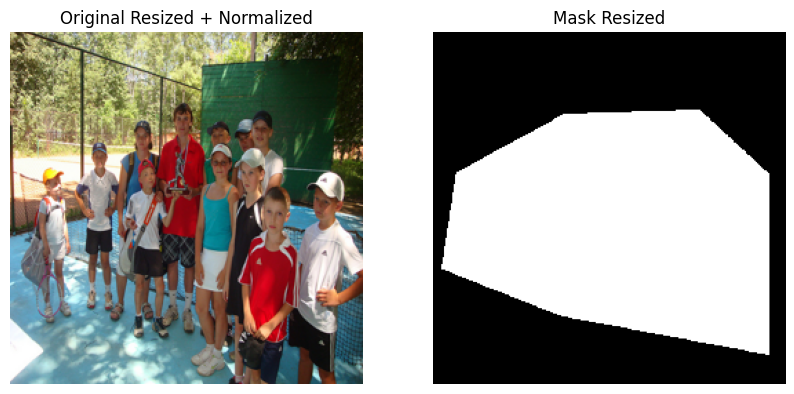

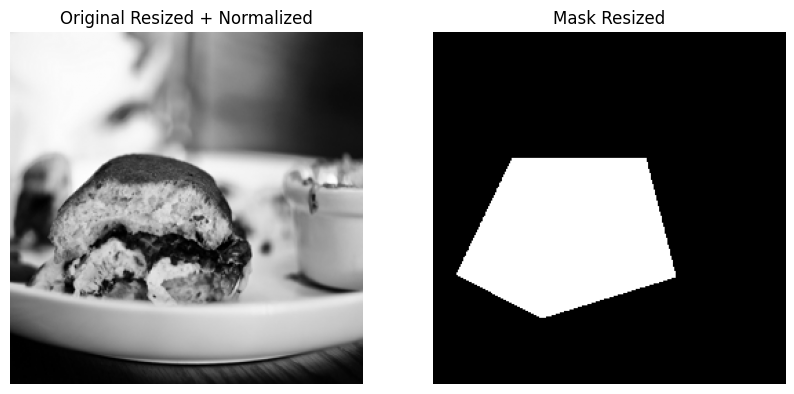

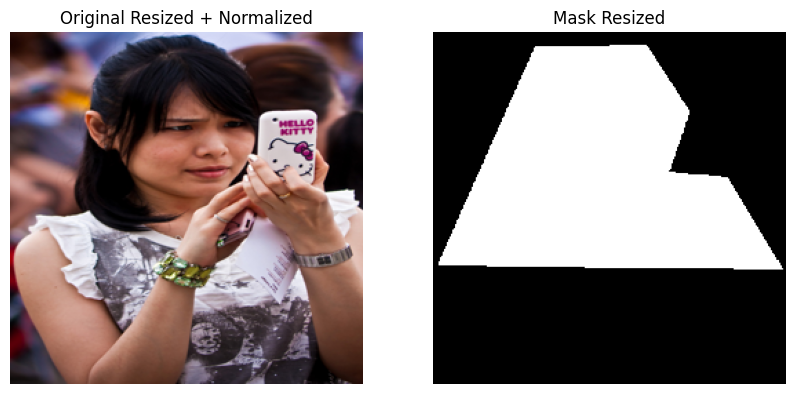

In [5]:
random.shuffle(images_with_masks)
samples = images_with_masks[:3]

for img_name, mask_name in samples:
    img_path  = os.path.join(images_folder, img_name)
    mask_path = os.path.join(masks_folder, mask_name)
    
    image = Image.open(img_path).convert("RGB").resize(target_size)
    mask  = Image.open(mask_path).resize(target_size)
    
    image_np = np.array(image) / 255.0
    mask_np  = np.array(mask) / 255.0
    
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    ax[0].imshow(image_np)
    ax[0].set_title("Original Resized + Normalized")
    ax[0].axis('off')
    
    ax[1].imshow(mask_np, cmap='gray')
    ax[1].set_title("Mask Resized")
    ax[1].axis('off')
    
    plt.show()


In [6]:
def augment_image(image, mask):
    if random.random() > 0.5:
        image = Image.fromarray(np.array(image)[:, ::-1, :])
        mask  = Image.fromarray(np.array(mask)[:, ::-1])
    if random.random() > 0.5:
        image = Image.fromarray(np.array(image)[::-1, :, :])
        mask  = Image.fromarray(np.array(mask)[::-1, :])
    angle = random.choice([-30, -15, 0, 15, 30])
    image = image.rotate(angle)
    mask  = mask.rotate(angle)
    return image, mask


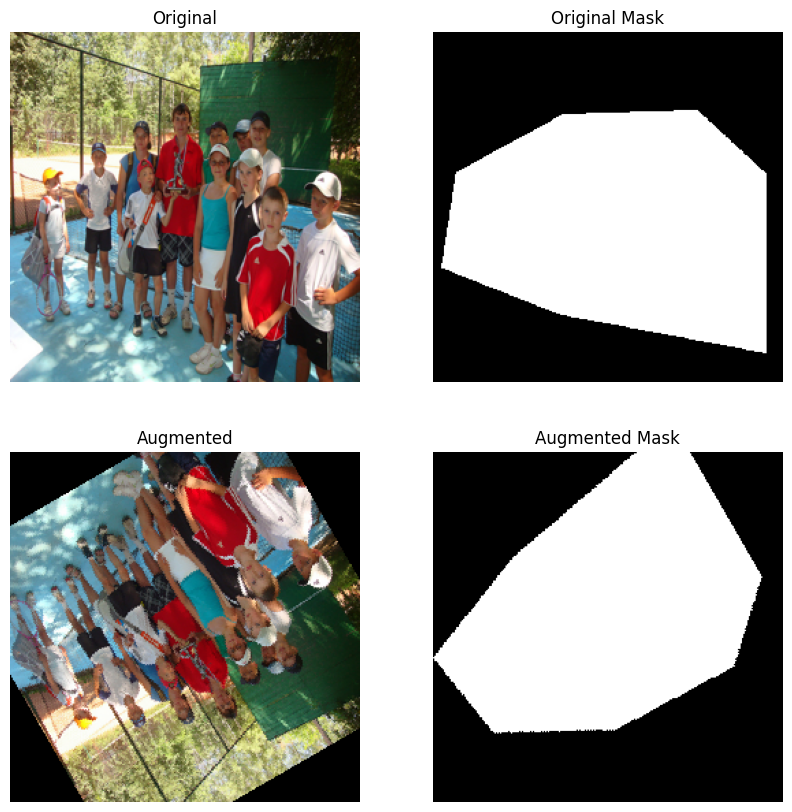

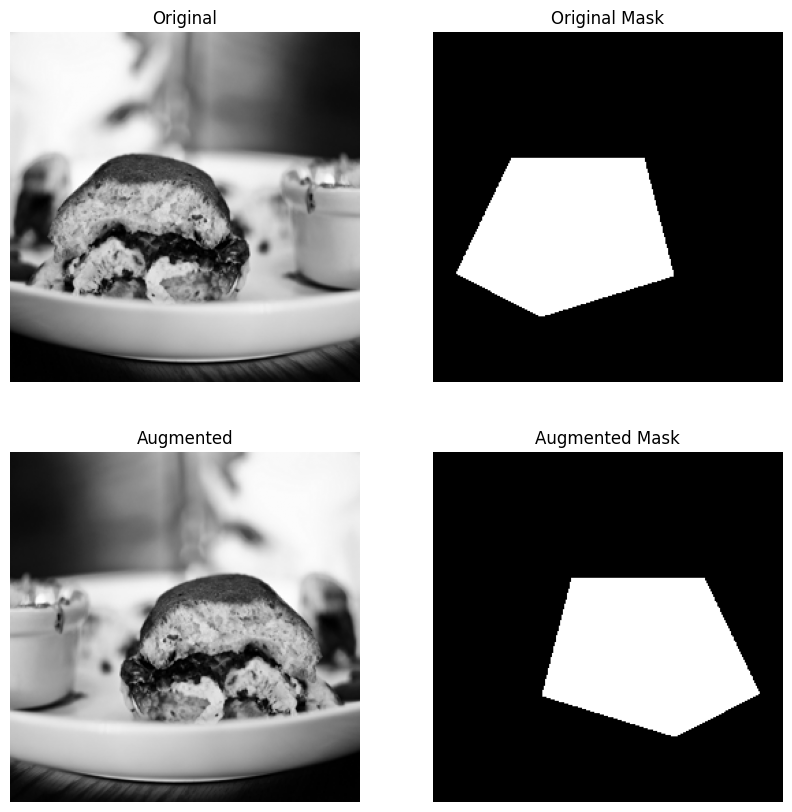

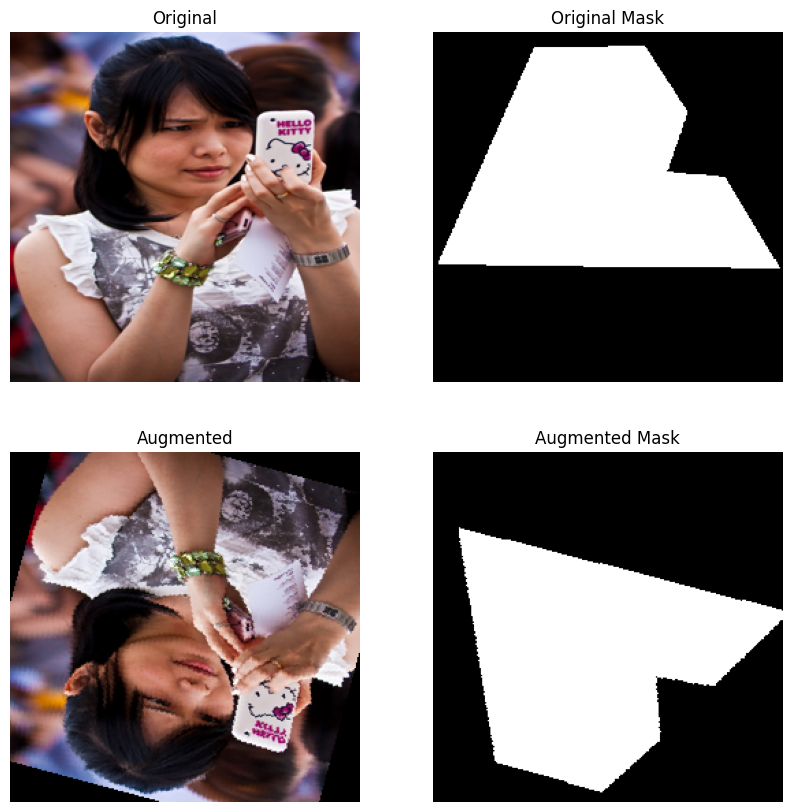

In [7]:
for img_name, mask_name in samples:
    img_path  = os.path.join(images_folder, img_name)
    mask_path = os.path.join(masks_folder, mask_name)
    
    image = Image.open(img_path).convert("RGB").resize(target_size)
    mask  = Image.open(mask_path).resize(target_size)
    
    aug_image, aug_mask = augment_image(image, mask)
    
    image_np = np.array(image)/255.0
    mask_np  = np.array(mask)/255.0
    aug_np   = np.array(aug_image)/255.0
    aug_mask_np = np.array(aug_mask)/255.0
    
    fig, ax = plt.subplots(2, 2, figsize=(10,10))
    ax[0,0].imshow(image_np)
    ax[0,0].set_title("Original")
    ax[0,0].axis('off')
    
    ax[0,1].imshow(mask_np, cmap='gray')
    ax[0,1].set_title("Original Mask")
    ax[0,1].axis('off')
    
    ax[1,0].imshow(aug_np)
    ax[1,0].set_title("Augmented")
    ax[1,0].axis('off')
    
    ax[1,1].imshow(aug_mask_np, cmap='gray')
    ax[1,1].set_title("Augmented Mask")
    ax[1,1].axis('off')
    
    plt.show()
